In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

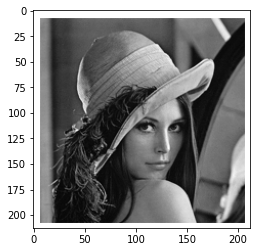

In [3]:
image = cv2.imread("/home/student/Downloads/Original-image-of-Lena-200X200-pixels.png")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image ,cmap="gray")

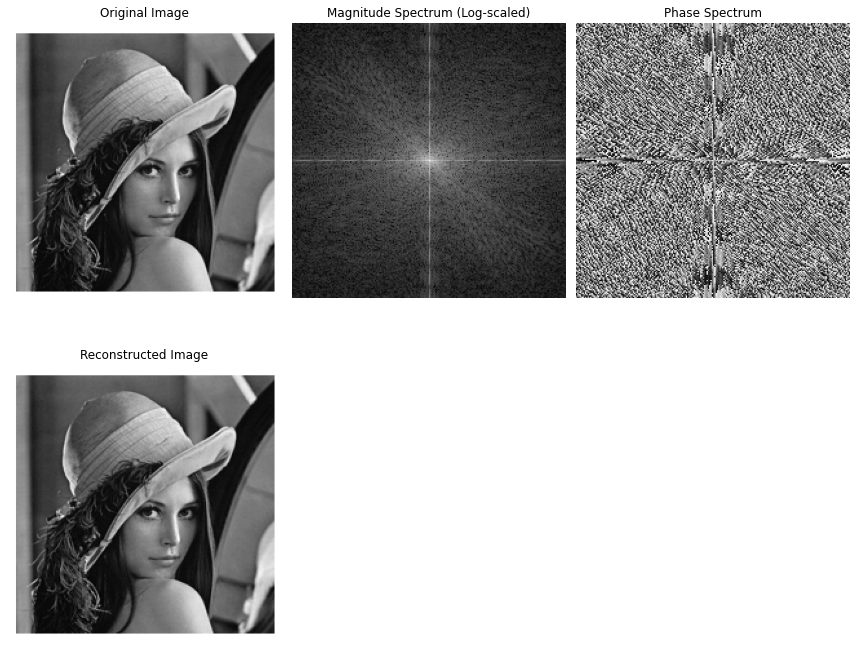

In [4]:
gray_image = cv2.imread("/home/student/Downloads/Original-image-of-Lena-200X200-pixels.png", cv2.IMREAD_GRAYSCALE)

gray_image = gray_image / 255.0

dft = cv2.dft(np.float32(gray_image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shifted = np.fft.fftshift(dft)

magnitude_spectrum = cv2.magnitude(dft_shifted[:, :, 0], dft_shifted[:, :, 1])
magnitude_spectrum = np.log(magnitude_spectrum + 1)  # Log scale for visibility
phase = np.arctan2(dft_shifted[:, :, 1], dft_shifted[:, :, 0])

reconstructed_image = cv2.idft(dft)
reconstructed_image = cv2.magnitude(reconstructed_image[:, :, 0], reconstructed_image[:, :, 1])

plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# DFT Magnitude Spectrum
plt.subplot(2, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum (Log-scaled)')
plt.axis('off')

# DFT Phase
plt.subplot(2, 3, 3)
plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')

# Reconstructed Image
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.tight_layout()
plt.show()



In [5]:
def dft_2d(image):
    M, N = image.shape
    dft_result = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum_val = 0
            for x in range(M):
                for y in range(N):
                    angle = 2 * np.pi * (u * x / M + v * y / N)
                    sum_val += image[x, y] * np.exp(-1j * angle)
            dft_result[u, v] = sum_val

    return dft_result

In [ ]:
img = dft_2d(image)

ValueError: num must be an integer with 1 <= num <= 64, not 65

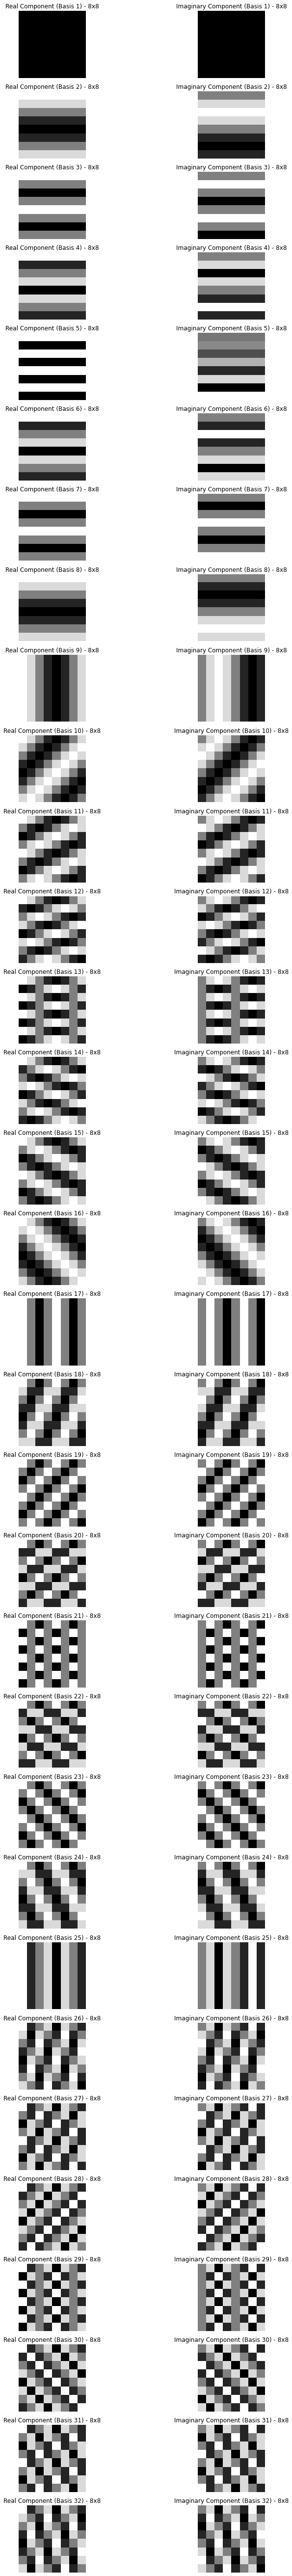

In [6]:
def create_basis_images(size):
    M, N = size
    basis_images = []

    for u in range(M):
        for v in range(N):
            x = np.arange(M)
            y = np.arange(N)
            X, Y = np.meshgrid(x, y)

            basis_real = np.cos(2 * np.pi * (u * X / M + v * Y / N))
            basis_imag = np.sin(2 * np.pi * (u * X / M + v * Y / N))

            basis_images.append((basis_real, basis_imag))

    return basis_images

# Create basis images for 8x8 and 16x16
basis_images_8x8 = create_basis_images((8, 8))
basis_images_16x16 = create_basis_images((16, 16))

def plot_basis_images(basis_images, size):
    """Plot the real and imaginary components of the basis images."""
    num_basis = len(basis_images)
    num_cols = 2  # Real and Imaginary
    num_rows = num_basis // num_cols + (num_basis % num_cols > 0)

    plt.figure(figsize=(12, num_rows * 3))
    for i, (real, imag) in enumerate(basis_images):
        plt.subplot(num_rows, num_cols, 2 * i + 1)
        plt.imshow(real, cmap='gray')
        plt.title(f'Real Component (Basis {i+1}) - {size[0]}x{size[1]}')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, 2 * i + 2)
        plt.imshow(imag, cmap='gray')
        plt.title(f'Imaginary Component (Basis {i+1}) - {size[0]}x{size[1]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot basis images for 8x8
plot_basis_images(basis_images_8x8, (8, 8))

# Plot basis images for 16x16
plot_basis_images(basis_images_16x16, (16, 16))

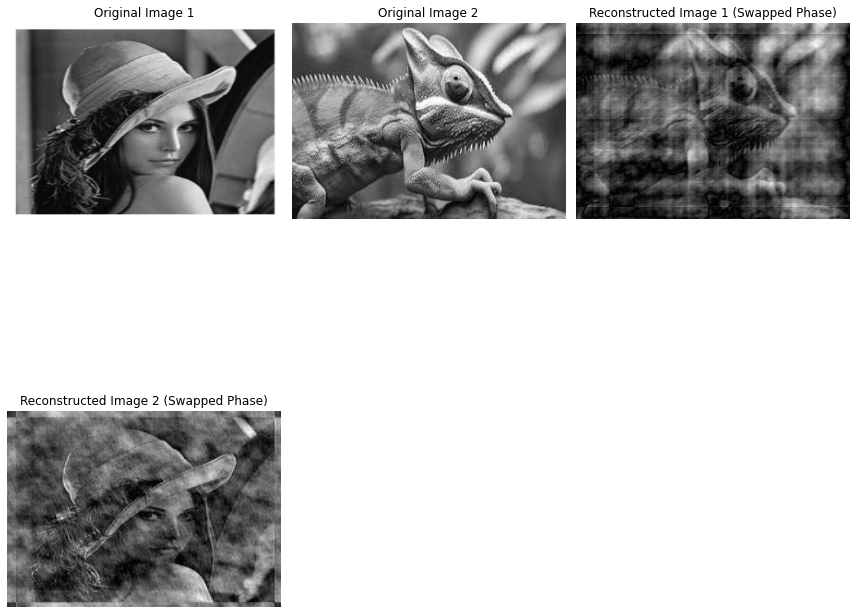

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
# Load two texture-based images
img1 = cv2.imread('/home/student/Downloads/Original-image-of-Lena-200X200-pixels.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/home/student/Downloads/images.jpeg', cv2.IMREAD_GRAYSCALE)

# Resize images to the size of the larger image
img1_resized = cv2.resize(img1, (max(img1.shape[1], img2.shape[1]), max(img1.shape[0], img2.shape[0])))
img2_resized = cv2.resize(img2, (max(img1.shape[1], img2.shape[1]), max(img1.shape[0], img2.shape[0])))

# Function to compute 2D DFT using NumPy and OpenCV (using fft2 from numpy)
def compute_dft(image):
    dft = np.fft.fft2(image)  # Compute the 2D Fourier transform
    dft_shifted = np.fft.fftshift(dft)  # Shift the zero-frequency component to the center
    magnitude = np.abs(dft_shifted)  # Magnitude spectrum
    phase = np.angle(dft_shifted)  # Phase spectrum
    return magnitude, phase, dft_shifted

# Compute DFT of both resized images
magnitude1, phase1, dft1 = compute_dft(img1_resized)
magnitude2, phase2, dft2 = compute_dft(img2_resized)

# Swap phase between the two images
reconstructed_dft1 = magnitude1 * np.exp(1j * phase2)  # Reconstruct image 1 with phase of image 2
reconstructed_dft2 = magnitude2 * np.exp(1j * phase1)  # Reconstruct image 2 with phase of image 1

# Apply inverse DFT to get the images back
reconstructed_img1 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_dft1)))  # Apply inverse DFT to image 1
reconstructed_img2 = np.abs(np.fft.ifft2(np.fft.ifftshift(reconstructed_dft2)))  # Apply inverse DFT to image 2

# Plot the results
plt.figure(figsize=(12, 12))

# Original Image 1
plt.subplot(2, 3, 1)
plt.imshow(img1_resized, cmap='gray')
plt.title('Original Image 1')
plt.axis('off')

# Original Image 2
plt.subplot(2, 3, 2)
plt.imshow(img2_resized, cmap='gray')
plt.title('Original Image 2')
plt.axis('off')

# Reconstructed Image 1 (from swapped phase)
plt.subplot(2, 3, 3)
plt.imshow(reconstructed_img1, cmap='gray')
plt.title('Reconstructed Image 1 (Swapped Phase)')
plt.axis('off')

# Reconstructed Image 2 (from swapped phase)
plt.subplot(2, 3, 4)
plt.imshow(reconstructed_img2, cmap='gray')
plt.title('Reconstructed Image 2 (Swapped Phase)')
plt.axis('off')

plt.tight_layout()
plt.show()
